Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data_AUG = pd.read_csv("apartments_pl_2023_08.csv")
data_SEP = pd.read_csv("apartments_pl_2023_09.csv")
data_OCT = pd.read_csv("apartments_pl_2023_10.csv")

In [3]:
data_AUG.drop(columns=["id"], inplace=True)
data_AUG.drop(columns=["schoolDistance","clinicDistance","postOfficeDistance","kindergartenDistance","restaurantDistance","collegeDistance","pharmacyDistance"], inplace=True)
data_AUG.drop(columns=["buildingMaterial","condition"], inplace=True)

data_SEP.drop(columns=["id"], inplace=True)
data_SEP.drop(columns=["schoolDistance","clinicDistance","postOfficeDistance","kindergartenDistance","restaurantDistance","collegeDistance","pharmacyDistance"], inplace=True)
data_SEP.drop(columns=["buildingMaterial","condition"], inplace=True)

data_OCT.drop(columns=["id"], inplace=True)
data_OCT.drop(columns=["schoolDistance","clinicDistance","postOfficeDistance","kindergartenDistance","restaurantDistance","collegeDistance","pharmacyDistance"], inplace=True)
data_OCT.drop(columns=["buildingMaterial","condition"], inplace=True)


data_SEP.drop_duplicates(inplace = True)
data_AUG.drop_duplicates(inplace = True)
data_OCT.drop_duplicates(inplace = True)

Na podstawie wcześniejszej analizy usuwamy kolumny: "schoolDistance","clinicDistance","postOfficeDistance","kindergartenDistance","restaurantDistance","collegeDistance","pharmacyDistance", gdyż są one silnie ze sobą skorelowane, a w danych występuje dodatkowa zależna od nich kolumna "poiCount". Usuwamy również kolumnę "id" zawierającą unikatowy identyfikator wiersza, oraz ze względu na wysoki procent braków w rekordach kolumny "buildingMaterial" i "condition"

In [4]:
missing_values = pd.concat([
        data_AUG.isna().sum(),
        data_AUG.isna().sum() / len(data_AUG) * 100,
        data_SEP.isna().sum(),
        data_SEP.isna().sum() / len(data_SEP) * 100,
        data_OCT.isna().sum(),
        data_OCT.isna().sum() / len(data_OCT) * 100
    ],
    axis=1
)
missing_values.rename(columns = {0:'AUG', 1:'AUG %',2:'SEP', 3:'SEP %',4:'OCT', 5:'OCT %',6:'ALL', 7:'ALL %'}, inplace = True)
missing_values

,AUG,AUG %,SEP,SEP %,OCT,OCT %
city,0,0.00,0,0.00,0,0.00
type,3983,21.31,3764,22.40,3727,22.56
squareMeters,0,0.00,0,0.00,0,0.00
rooms,0,0.00,0,0.00,0,0.00
floor,3392,18.15,3003,17.87,3017,18.26
floorCount,259,1.39,243,1.45,242,1.46
buildYear,3223,17.25,2903,17.27,2879,17.43
latitude,0,0.00,0,0.00,0,0.00
longitude,0,0.00,0,0.00,0,0.00
centreDistance,0,0.00,0,0.00,0,0.00


<Axes: >

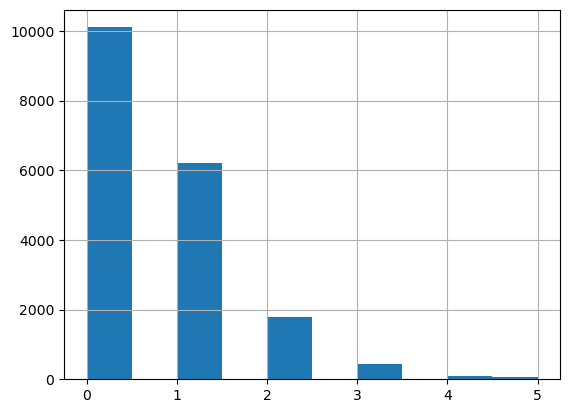

In [5]:
data_AUG.isna().sum(1).hist()

<Axes: >

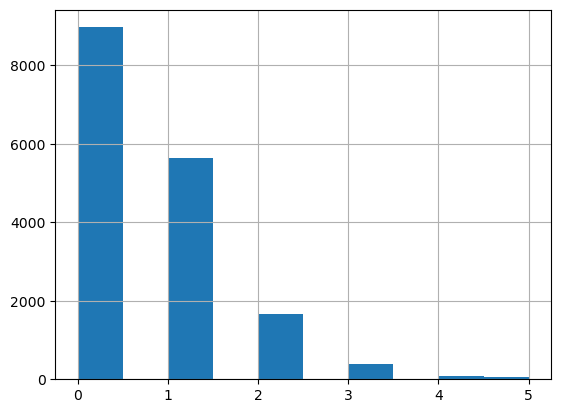

In [6]:
data_SEP.isna().sum(1).hist()

<Axes: >

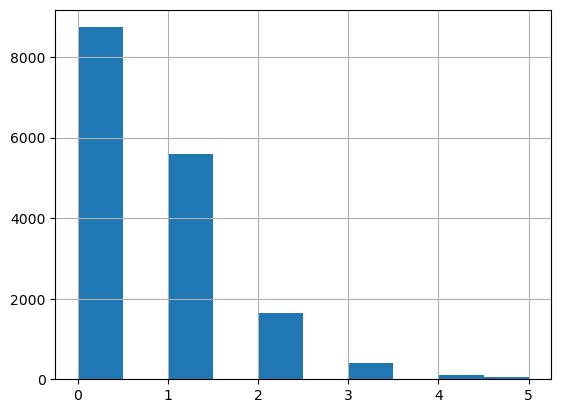

In [7]:
data_OCT.isna().sum(1).hist()

In [8]:
data_AUG = data_AUG.loc[(data_AUG.isna().sum(axis=1)<3)]
data_SEP = data_SEP.loc[(data_SEP.isna().sum(axis=1)<3)]
data_OCT = data_OCT.loc[(data_OCT.isna().sum(axis=1)<3)]

Ze względu na niski odsetek rekordów posiadajacych więcej, niż dwa braki, oferty takie zostały usunięte, celem łatwiejszej obsługi braków w ofertach.

In [9]:
missing_values = pd.concat([
        data_AUG.isna().sum(),
        data_AUG.isna().sum() / len(data_AUG) * 100,
        data_SEP.isna().sum(),
        data_SEP.isna().sum() / len(data_SEP) * 100,
        data_OCT.isna().sum(),
        data_OCT.isna().sum() / len(data_OCT) * 100
    ],
    axis=1
)
missing_values.rename(columns = {0:'AUG', 1:'AUG %',2:'SEP', 3:'SEP %',4:'OCT', 5:'OCT %',6:'ALL', 7:'ALL %'}, inplace = True)
missing_values

,AUG,AUG %,SEP,SEP %,OCT,OCT %
city,0,0.00,0,0.00,0,0.00
type,3483,19.25,3312,20.36,3249,20.35
squareMeters,0,0.00,0,0.00,0,0.00
rooms,0,0.00,0,0.00,0,0.00
floor,2979,16.47,2630,16.17,2631,16.48
floorCount,54,0.30,42,0.26,41,0.26
buildYear,2719,15.03,2465,15.16,2428,15.21
latitude,0,0.00,0,0.00,0,0.00
longitude,0,0.00,0,0.00,0,0.00
centreDistance,0,0.00,0,0.00,0,0.00


## Przypisanie miesiąca do poszczególnych ofert na podstawie pliku, z którego pochodzą dane

In [10]:
# dodanie miesiąca, w którym dana oferta sprzedaży była dostępna (wszystkie dane pochodzą z roku 2023)
data_AUG["offerMonth"] = 8
data_SEP["offerMonth"] = 9
data_OCT["offerMonth"] = 10

Do każdej oferty dodajemy informację o miesiącu, z którego pochodzi, co po złączeniu plików da nam informację o trendach zmian cen w danym przedziale czasu.

In [11]:
data_ALL = pd.concat([data_AUG, data_SEP, data_OCT], ignore_index=True)

In [12]:
data_ALL.tail()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,offerMonth
50318,bydgoszcz,NaN,50.12,2.00,1.00,1.00,NaN,53.13,18.00,0.88,42.00,condominium,yes,no,no,no,no,360000,10
50319,bydgoszcz,tenement,100.00,4.00,3.00,4.00,1910.00,53.13,18.01,0.65,54.00,condominium,yes,yes,no,no,yes,590000,10
50320,bydgoszcz,tenement,59.10,2.00,1.00,1.00,1910.00,53.13,18.01,0.65,54.00,condominium,yes,no,no,no,yes,320000,10
50321,bydgoszcz,NaN,81.07,5.00,1.00,4.00,2019.00,53.12,17.96,3.04,9.00,condominium,no,yes,yes,no,no,679000,10
50322,bydgoszcz,blockOfFlats,133.16,4.00,3.00,3.00,NaN,53.11,17.99,1.32,9.00,condominium,no,yes,no,no,yes,925000,10


In [13]:
data_ALL.count()

city               50323
type               40279
squareMeters       50323
rooms              50323
floor              42083
floorCount         50186
buildYear          42711
latitude           50323
longitude          50323
centreDistance     50323
poiCount           50323
ownership          50323
hasParkingSpace    50323
hasBalcony         50323
hasElevator        48750
hasSecurity        50323
hasStorageRoom     50323
price              50323
offerMonth         50323
dtype: int64

In [14]:
# TODO Wypełnienie braków (type, buildYear, floor, floorCount, hasElevator)
# type, buildYear - raczej trudno uzupełnić, niska korelacja z ceną, usunąć kolumnę(?)
# floorCount -> usunąć wiersze (?) to tylko kilkadziesiąt ofert, 
# hasElevator można ustawić na podstawie floorCount, powinno być dość zgodnie z rzeczywistością,
# floor (?) może usunąć kolumnę, niemal zerowa korelacja z ceną, a i tak mamy sporo innych zmiennych

In [15]:
# TODO obsługa odchyłek (outlayers)

In [16]:
# TODO przystosowanie istniejących kolumn (np. one-hot encoding dla danych dyskretnych,. normalizacja danych ciągłych)